In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import pickle

SUBONTOLOGIES = ['BPO', 'MFO', 'CCO']
SUBONTOLOGIES_LABELS = {
    'BPO': 'Biological Process',
    'MFO': 'Molecular Function',
    'CCO': 'Cellular Component'
}
SUBONTOLOGIES_COLORS = {
    'BPO': 'forestgreen',
    'MFO': 'tomato',
    'CCO': 'steelblue'
}
DATASETS = ['H30', 'ATGO', 'D1']
SWISSPROT_VERSIONS=[
    "1.0", "4.0", "7.0", "10.0", "13.0", "15.0",
    "2010_01", "2011_01", "2012_01", "2013_01", "2014_01", "2015_01",
    "2016_01", "2017_01", "2018_01", "2019_01", "2020_01", "2021_01",
    "2022_01", "2023_01", "2024_01"
]
DEFAULT_K_VALUES = [1, 3, 5, 10, 15, 20]

In [2]:
def load_evaluation_results(dataset, subontology, swissprot_version, method=None, k=None, use_2024_annotations=False):
    """
    Load evaluation results pickle file based on dataset, subontology, and SwissProt version.
    
    Args:
        dataset: Dataset name (H30, ATGO, D1)
        subontology: Subontology (BPO, MFO, CCO)
        swissprot_version: SwissProt version
        method: Optional method name to filter by
        k: Optional k value for BlastKNN method
        use_2024_annotations: If True, use the _2024_annotations path
    
    Returns:
        Loaded pickle file content
    """
    base_path = f"/home/atoffano/PFP_baselines/results/{dataset}/baselines_{dataset}_{swissprot_version}_{subontology}"
    if use_2024_annotations:
        base_path += "_2024_annotations"

    if method == "BlastKNN" and k is not None:
        pattern = f"{base_path}/evaluation/BlastKNN_k{k}/beprof_eval_results.pkl"
    else:
        pattern = f"{base_path}/evaluation/{method}/beprof_eval_results.pkl"

    files = glob.glob(pattern)
    if files:
        with open(files[0], 'rb') as f:
            return pickle.load(f)
    raise FileNotFoundError(f"No evaluation results found for {dataset}, {subontology}, {swissprot_version}, use_2024_annotations={use_2024_annotations}")

In [51]:
load_evaluation_results("ATGO", "MFO", "2024_01", method="AlignmentScore", k=20, use_2024_annotations=False)

{'ontology': 'mf',
 'recalls': array([0.54795834, 0.57130346, 0.57130346, 0.57808002, 0.58381033,
        0.5946531 , 0.60014989, 0.60234159, 0.60619866, 0.6096028 ,
        0.61370973, 0.6170722 , 0.62602513, 0.62807641, 0.62934383,
        0.63407025, 0.63802371, 0.64075406, 0.6419079 , 0.64590974,
        0.64837311, 0.65243269, 0.65694443, 0.65833065, 0.66116737,
        0.66581572, 0.66850574, 0.67170504, 0.67524983, 0.67661628,
        0.68237711, 0.68783978, 0.69101771, 0.6916015 , 0.69656757,
        0.69669577, 0.69762984, 0.70005872, 0.70308436, 0.70602163,
        0.708659  , 0.71031047, 0.71333474, 0.71408363, 0.71981515,
        0.72050196, 0.72262498, 0.72534919, 0.72560094, 0.72986251,
        0.73209809, 0.73314205, 0.73581396, 0.73772039, 0.74125571,
        0.74405874, 0.74455408, 0.75115807, 0.75187048, 0.75652609,
        0.75839422, 0.76131099, 0.76337754, 0.76656266, 0.76656266,
        0.76694728, 0.77056954, 0.77575103, 0.78072165, 0.78428004,
        0.78688939

/tmp/ipykernel_2563548/1487335809.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right')
/tmp/ipykernel_2563548/1487335809.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right')
/tmp/ipykernel_2563548/1487335809.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right')
/tmp/ipykernel_2563548/1487335809.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(methods, rotation=45, ha='right')
/tmp/ipykernel_2563548/1487335809.py:30: UserWarning: set_ticklabels() should only be used with a fixed 

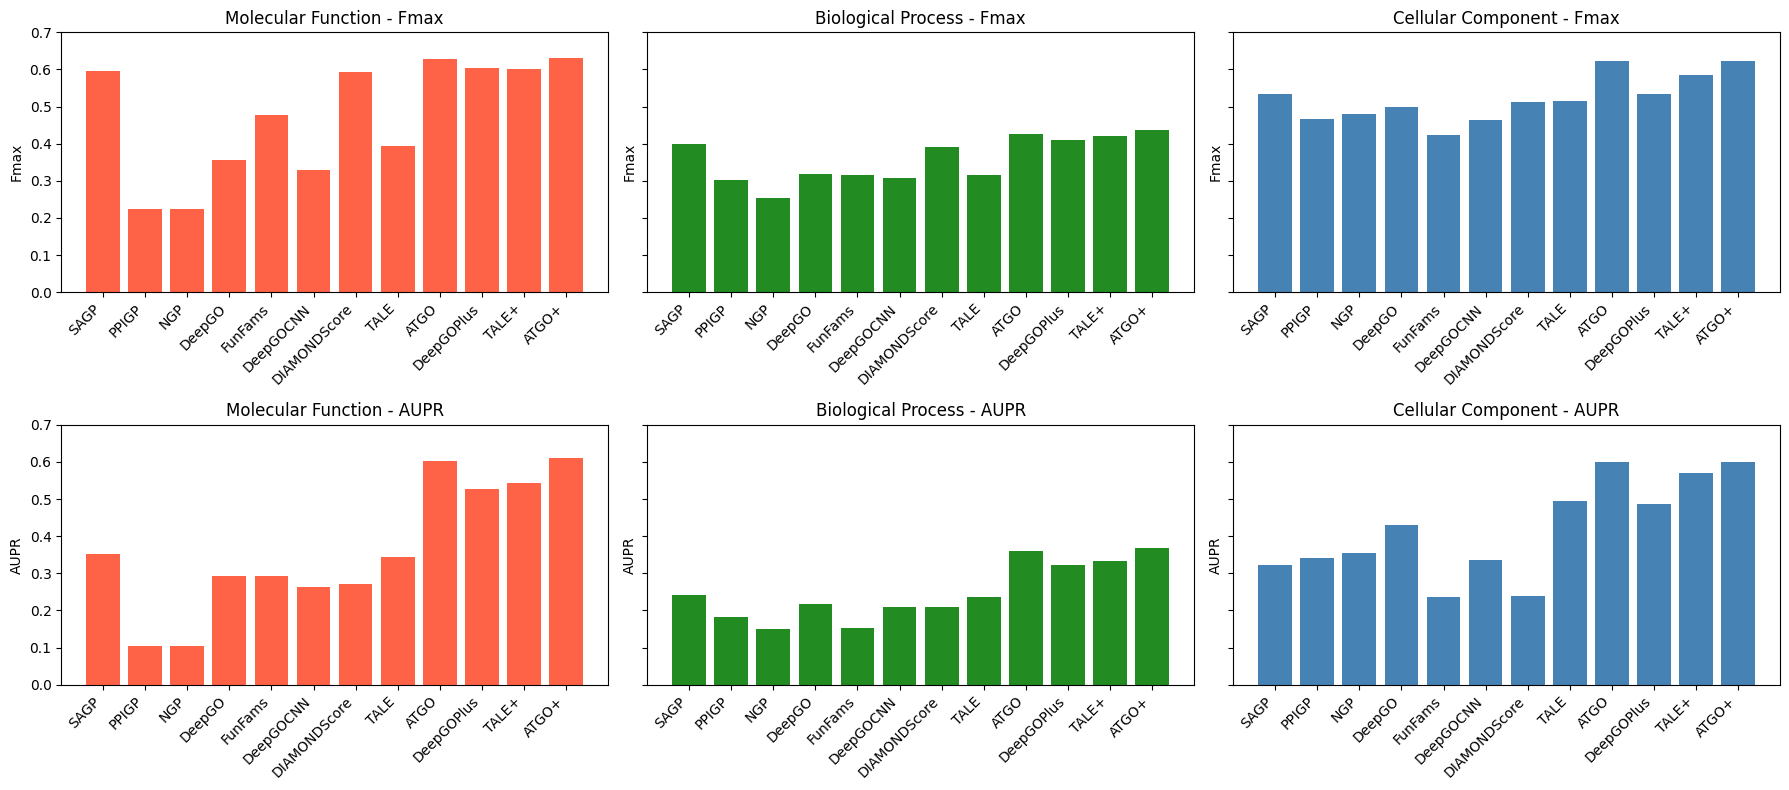

In [55]:
# Table data extracted from the image (ignoring numbers in parenthesis)
methods = [
    "SAGP", "PPIGP", "NGP", "DeepGO", "FunFams", "DeepGOCNN", "DIAMONDScore", "TALE", "ATGO",
    "DeepGOPlus", "TALE+", "ATGO+"
]
method_types = [
    "Single", "Single", "Single", "Single", "Single", "Single", "Single", "Single", "Single",
    "Composite", "Composite", "Composite"
]
fmax = {
    "MFO": [0.597, 0.224, 0.224, 0.355, 0.476, 0.328, 0.592, 0.393, 0.627, 0.603, 0.602, 0.631],
    "BPO": [0.400, 0.303, 0.254, 0.317, 0.315, 0.307, 0.391, 0.315, 0.425, 0.409, 0.420, 0.438],
    "CCO": [0.534, 0.467, 0.481, 0.499, 0.424, 0.463, 0.511, 0.516, 0.623, 0.533, 0.586, 0.624]
}
aupr = {
    "MFO": [0.351, 0.103, 0.103, 0.293, 0.294, 0.264, 0.272, 0.344, 0.603, 0.528, 0.542, 0.611],
    "BPO": [0.242, 0.181, 0.151, 0.218, 0.152, 0.208, 0.209, 0.236, 0.361, 0.323, 0.332, 0.368],
    "CCO": [0.322, 0.340, 0.355, 0.430, 0.236, 0.337, 0.239, 0.496, 0.600, 0.486, 0.569, 0.600]
}

fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey='row')
metrics = [("Fmax", fmax), ("AUPR", aupr)]

for row, (metric_name, metric_dict) in enumerate(metrics):
    for col, ontology in enumerate(["MFO", "BPO", "CCO"]):
        ax = axes[row, col]
        values = metric_dict[ontology]
        bars = ax.bar(methods, values, color=[SUBONTOLOGIES_COLORS[ontology]]*len(methods))
        ax.set_title(f"{SUBONTOLOGIES_LABELS[ontology]} - {metric_name}")
        ax.set_xticklabels(methods, rotation=45, ha='right')
        ax.set_ylabel(metric_name)
        ax.set_ylim(0, 0.7 if metric_name == "Fmax" else 0.7)
plt.tight_layout()
plt.show()

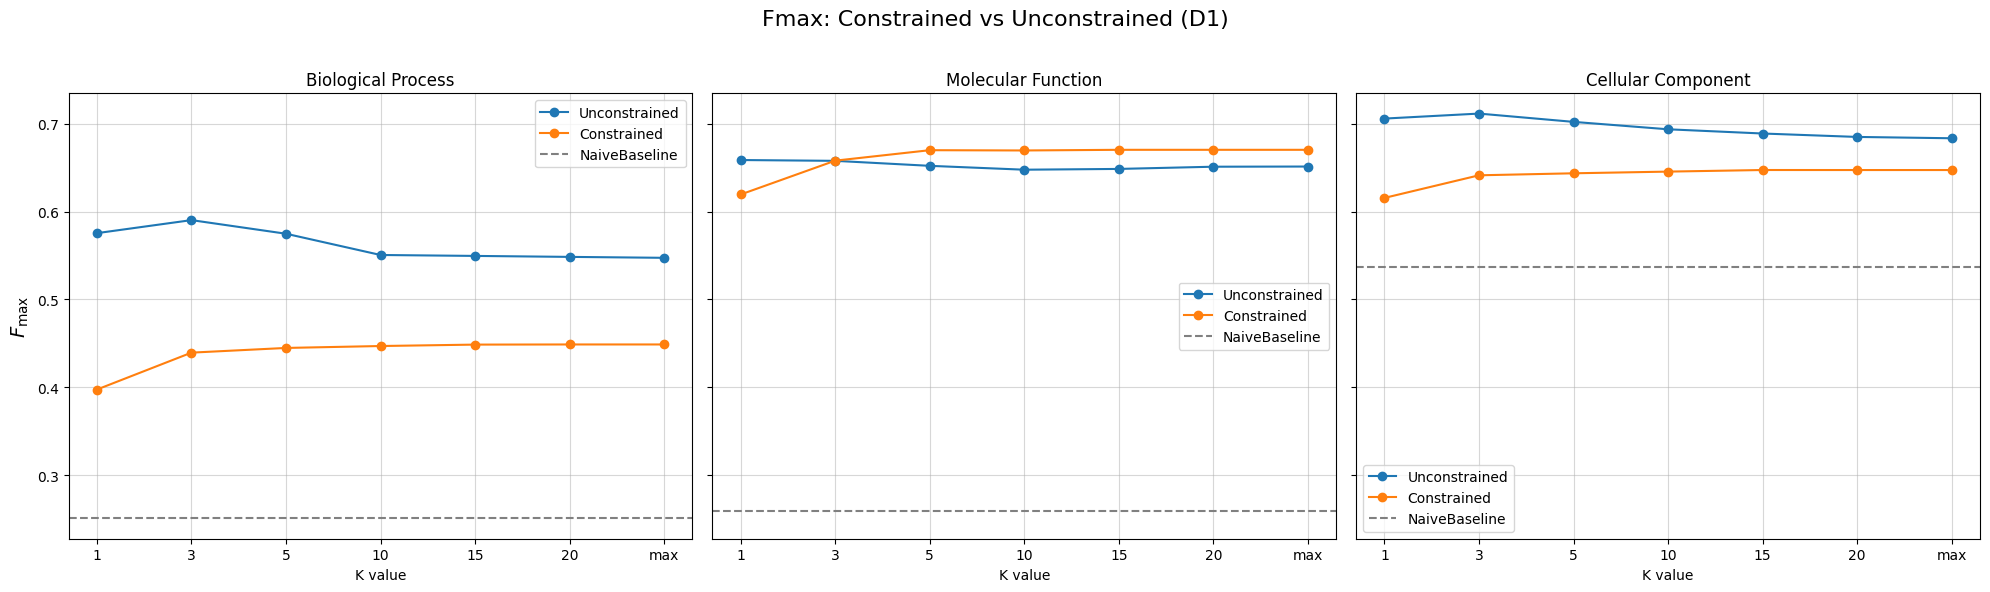

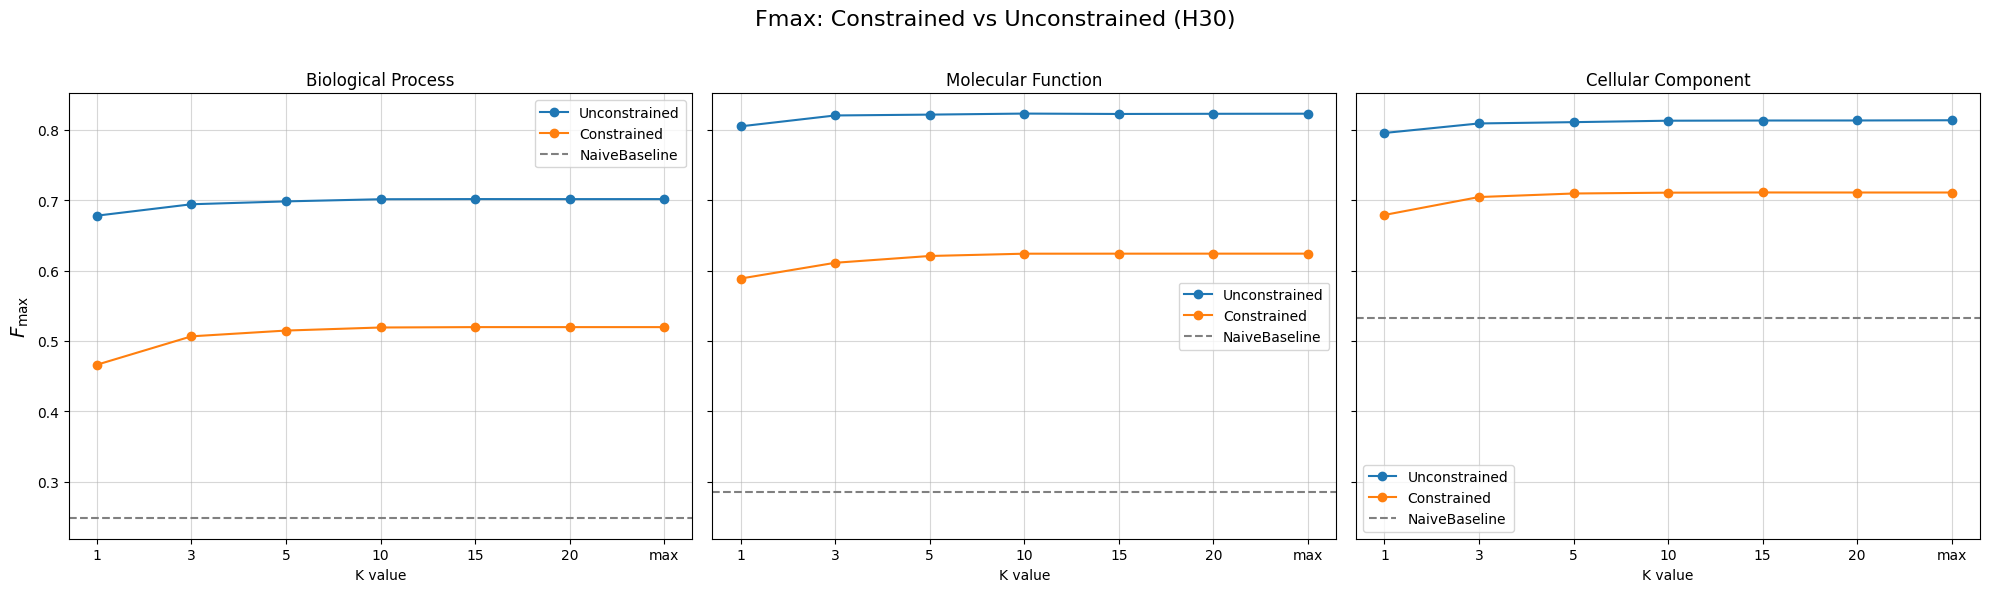

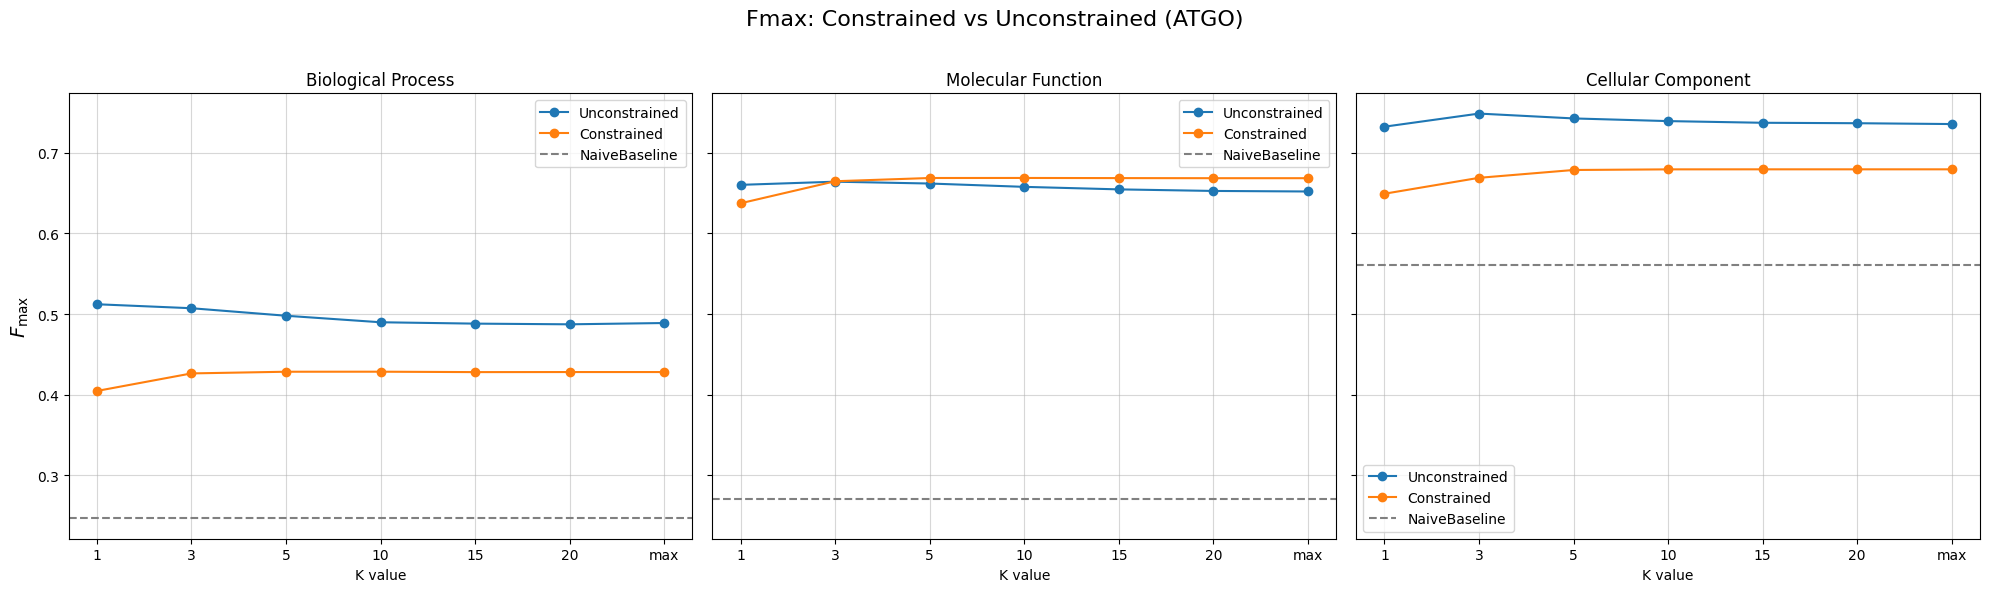

In [43]:
def plot_fmax_constraints(dataset, k_values=None, use_2024_annotations=False):
    """
    Plot Constrained vs Unconstrained Fmax evolution according to K value for all subontologies.
    NaiveBaseline is shown as a horizontal line.
    AlignmentScore is shown as 'max' k value.

    Args:
        dataset: Dataset name (e.g., 'ATGO')
        k_values: List of k values for BlastKNN (default: DEFAULT_K_VALUES)
        use_2024_annotations: Whether to use _2024_annotations results
    """
    if k_values is None:
        k_values = DEFAULT_K_VALUES

    x_labels = [str(k) for k in k_values] + ['max']

    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
    for idx, subontology in enumerate(SUBONTOLOGIES):
        ax = axes[idx]
        # Unconstrained results path template
        unconstrained_base = f"/home/atoffano/PFP_baselines/results/{dataset}/baselines_{dataset}_2024_01_{subontology}"
        if use_2024_annotations:
            unconstrained_base += "_2024_annotations"
        # Constrained results path template
        constrained_base = f"/home/atoffano/PFP_baselines/results/{dataset}/baselines_constrained_{dataset}__{subontology}"
        if use_2024_annotations:
            constrained_base += "_2024_annotations"

        unconstrained_fmax = []
        constrained_fmax = []
        for k in k_values:
            # Unconstrained
            try:
                unconstrained_path = f"{unconstrained_base}/evaluation/BlastKNN_k{k}/beprof_eval_results.pkl"
                with open(glob.glob(unconstrained_path)[0], 'rb') as f:
                    results = pickle.load(f)
                    unconstrained_fmax.append(results.get("result_fmax", np.nan))
            except Exception:
                unconstrained_fmax.append(np.nan)
            # Constrained
            try:
                constrained_path = f"{constrained_base}/evaluation/BlastKNN_k{k}/beprof_eval_results.pkl"
                with open(glob.glob(constrained_path)[0], 'rb') as f:
                    results = pickle.load(f)
                    constrained_fmax.append(results.get("result_fmax", np.nan))
            except Exception:
                constrained_fmax.append(np.nan)

        # AlignmentScore (as 'max')
        try:
            unconstrained_align_path = f"{unconstrained_base}/evaluation/AlignmentScore/beprof_eval_results.pkl"
            with open(glob.glob(unconstrained_align_path)[0], 'rb') as f:
                results = pickle.load(f)
                unconstrained_align_fmax = results.get("result_fmax", np.nan)
        except Exception:
            unconstrained_align_fmax = np.nan
        try:
            constrained_align_path = f"{constrained_base}/evaluation/AlignmentScore/beprof_eval_results.pkl"
            with open(glob.glob(constrained_align_path)[0], 'rb') as f:
                results = pickle.load(f)
                constrained_align_fmax = results.get("result_fmax", np.nan)
        except Exception:
            constrained_align_fmax = np.nan

        unconstrained_fmax.append(unconstrained_align_fmax)
        constrained_fmax.append(constrained_align_fmax)

        # NaiveBaseline (horizontal line)
        try:
            naive_path = f"{constrained_base}/evaluation/NaiveBaseline/beprof_eval_results.pkl"
            with open(glob.glob(naive_path)[0], 'rb') as f:
                results = pickle.load(f)
                naive_fmax = results.get("result_fmax", np.nan)
        except Exception:
            naive_fmax = np.nan

        ax.plot(x_labels, unconstrained_fmax, marker='o', label='Unconstrained', color='tab:blue')
        ax.plot(x_labels, constrained_fmax, marker='o', label='Constrained', color='tab:orange')
        ax.axhline(naive_fmax, color='gray', linestyle='--', label='NaiveBaseline')
        ax.set_title(f"{SUBONTOLOGIES_LABELS[subontology]}")
        ax.set_xlabel("K value")
        if idx == 0:
            ax.set_ylabel(r'$F_{\max}$', fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.5)

    fig.suptitle(f"Fmax: Constrained vs Unconstrained ({dataset})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_fmax_constraints("D1", k_values=[1, 3, 5, 10, 15, 20], use_2024_annotations=False)
plot_fmax_constraints("H30", k_values=[1, 3, 5, 10, 15, 20], use_2024_annotations=False)
plot_fmax_constraints("ATGO", k_values=[1, 3, 5, 10, 15, 20], use_2024_annotations=False)


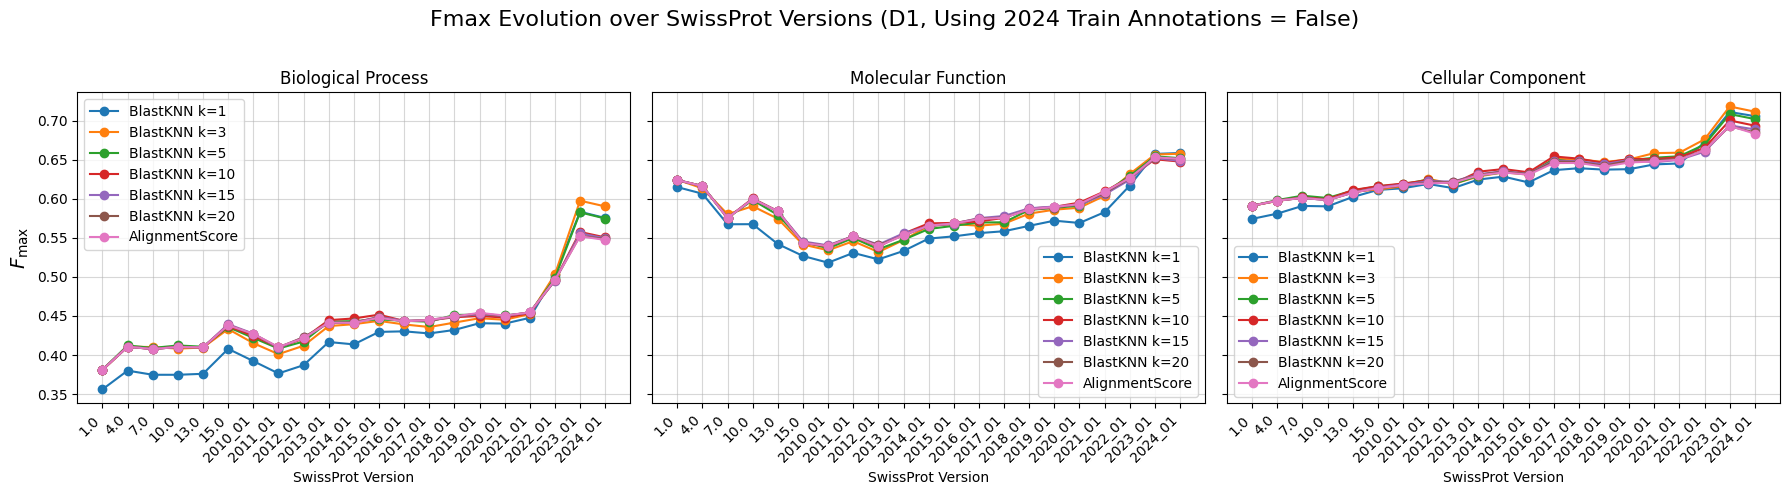

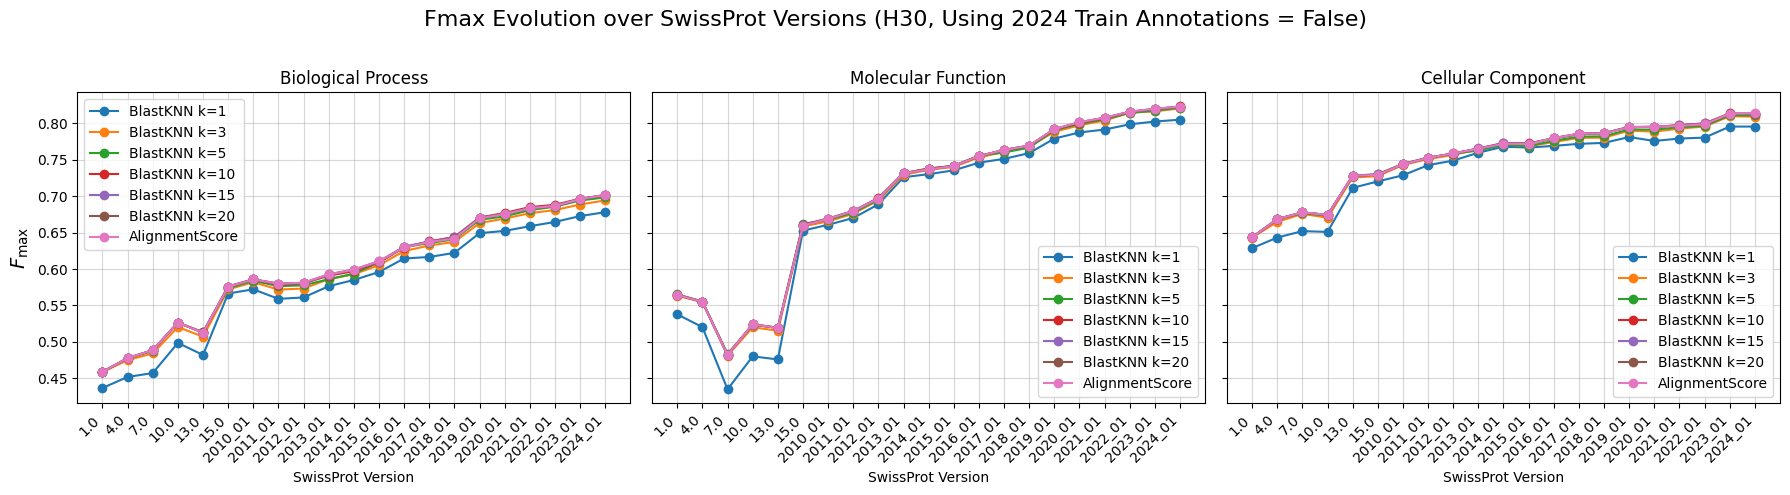

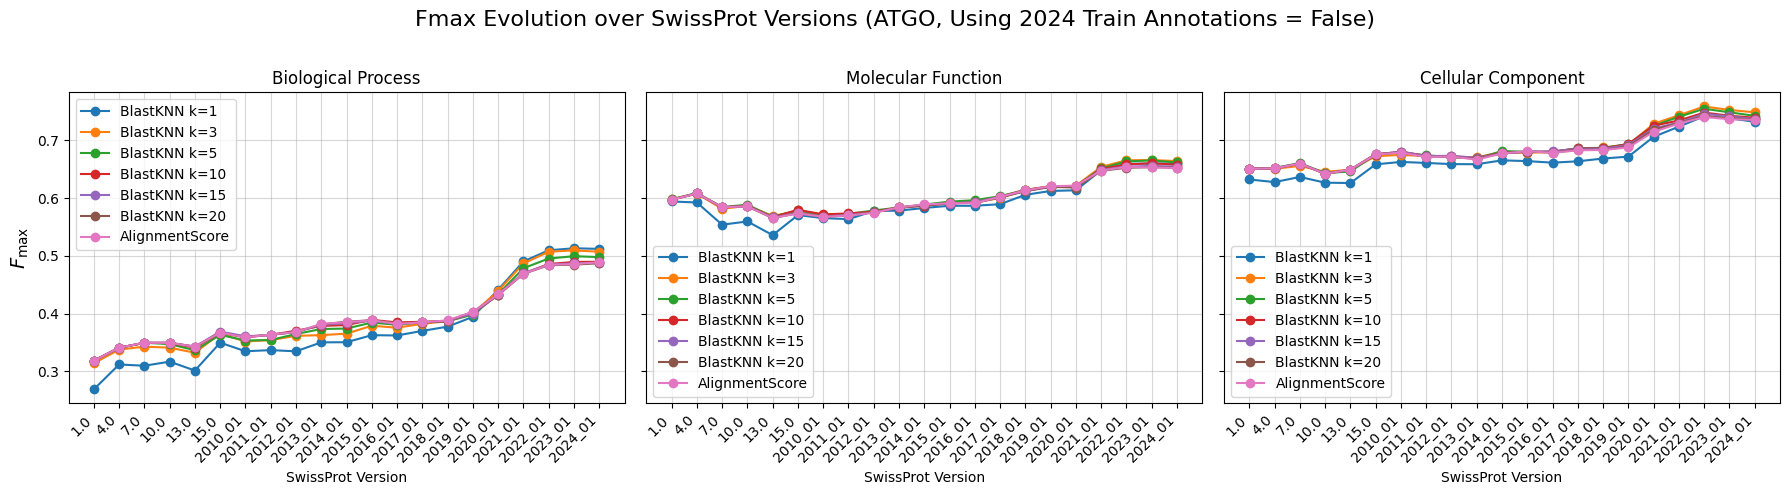

In [30]:
def plot_fmax_evolution(dataset, methods, k_values=None, use_2024_train_annotations=False):
    """
    Plot the evolution of Fmax over SwissProt versions for a given dataset.
    One curve per method (and per k for BlastKNN), 3 subplots (one per subontology).
    
    Args:
        dataset: Dataset name (H30, ATGO, D1)
        methods: List of method names (e.g., ['BlastKNN', 'Naive', 'DiamondScore'])
        k_values: List of k values for BlastKNN (default: DEFAULT_K_VALUES)
        use_2024_annotations: Whether to use _2024_annotations results
    """
    if k_values is None:
        k_values = DEFAULT_K_VALUES

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    for i, subontology in enumerate(SUBONTOLOGIES):
        ax = axes[i]
        for method in methods:
            fmax_scores = []
            for version in SWISSPROT_VERSIONS:
                try:
                    if method == "BlastKNN":
                        # Plot one curve per k
                        for k in k_values:
                            results = load_evaluation_results(
                                dataset, subontology, version, method="BlastKNN", k=k, use_2024_annotations=use_2024_train_annotations
                            )
                            fmax = results.get("result_fmax", np.nan)
                            if len(fmax_scores) < len(k_values):
                                fmax_scores.append([])
                            fmax_scores[k_values.index(k)].append(fmax)
                    else:
                        results = load_evaluation_results(
                            dataset, subontology, version, method=method, use_2024_annotations=use_2024_train_annotations
                        )
                        fmax = results.get("result_fmax", np.nan)
                        fmax_scores.append(fmax)
                except FileNotFoundError:
                    print(f"Results not found for {dataset}, {subontology}, {version}, method={method}, k={k if method == 'BlastKNN' else 'N/A'}")
            # Plotting
            if method == "BlastKNN":
                for idx, k in enumerate(k_values):
                    ax.plot(SWISSPROT_VERSIONS, fmax_scores[idx], marker='o', label=f"BlastKNN k={k}")
            else:
                ax.plot(SWISSPROT_VERSIONS, fmax_scores, marker='o', label=method)
        ax.set_title(SUBONTOLOGIES_LABELS[subontology])
        ax.set_xlabel("SwissProt Version")
        if i == 0:
            ax.set_ylabel(r'$F_{\max}$', fontsize=14)
        ax.tick_params(axis='x', rotation=45)
        ax.set_xticks(range(len(SWISSPROT_VERSIONS)))  # Set tick positions
        ax.set_xticklabels(SWISSPROT_VERSIONS, rotation=45, ha='right')  # Set tick labels
        ax.legend()
        ax.grid(True, alpha=0.5)
    fig.suptitle(f"Fmax Evolution over SwissProt Versions ({dataset}, Using 2024 Train Annotations = {use_2024_train_annotations})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_fmax_evolution("D1", ["BlastKNN", "AlignmentScore"], use_2024_train_annotations=False)
plot_fmax_evolution("H30", ["BlastKNN", "AlignmentScore"], use_2024_train_annotations=False)
plot_fmax_evolution("ATGO", ["BlastKNN", "AlignmentScore"], use_2024_train_annotations=False)


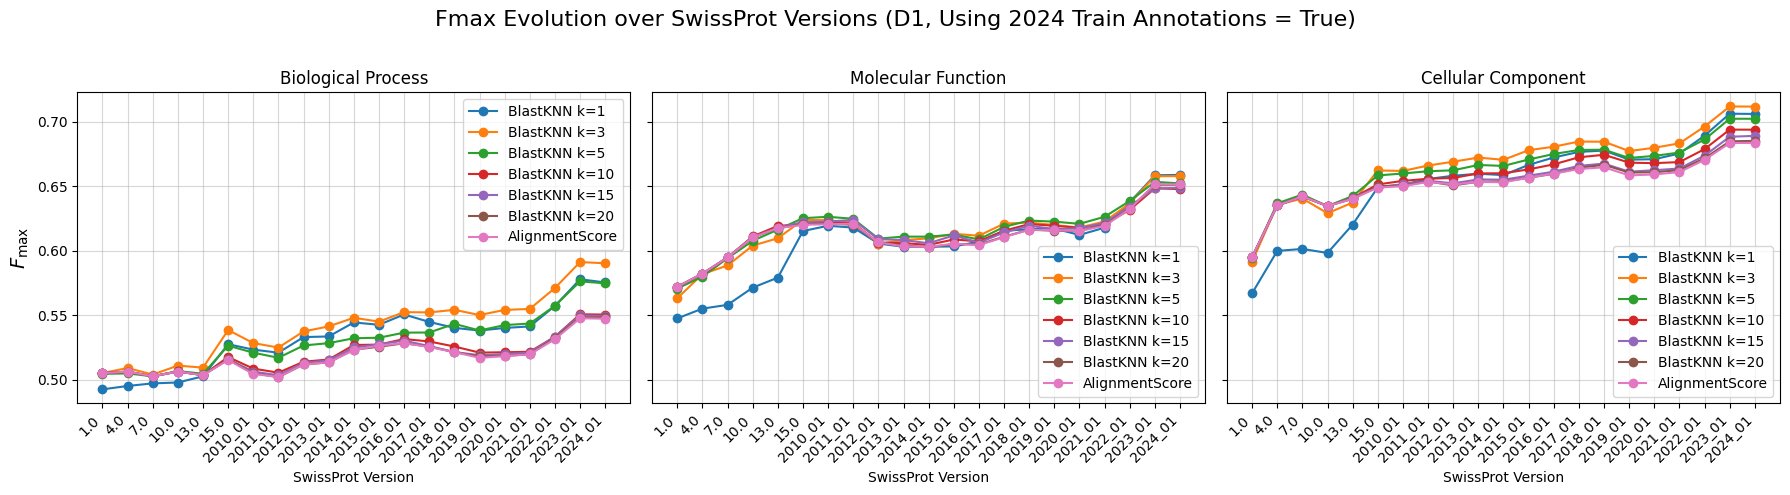

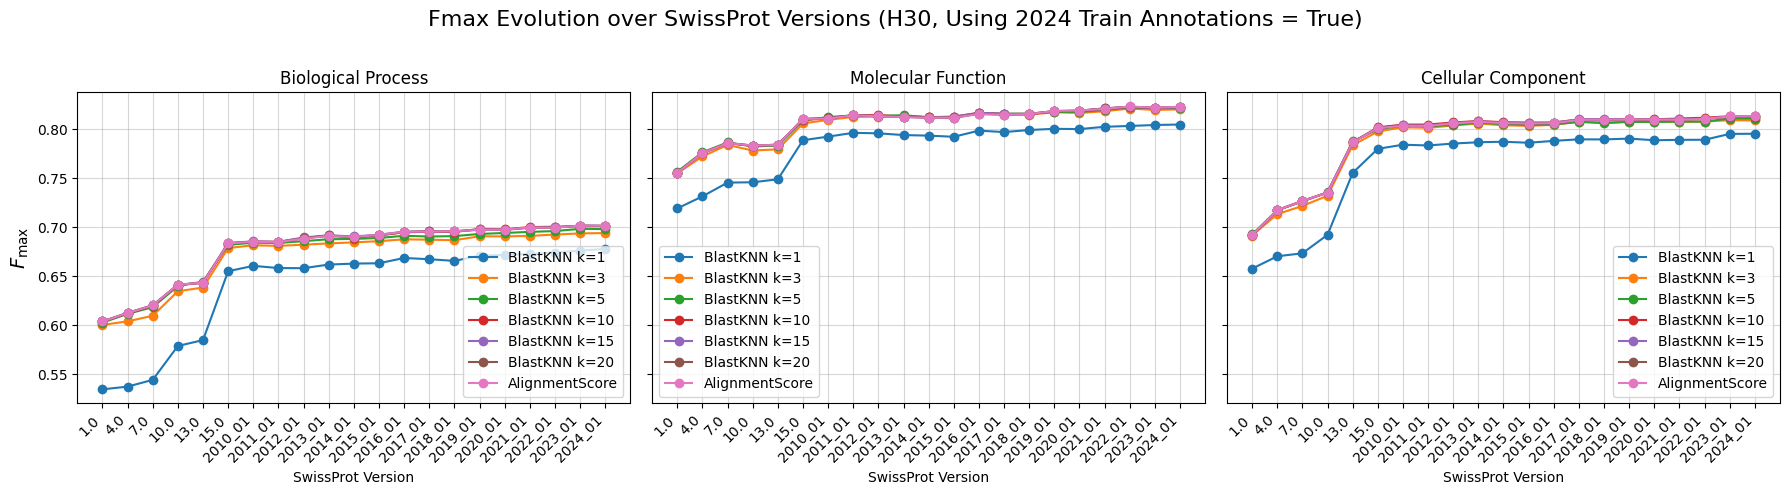

In [31]:
plot_fmax_evolution("D1", ["BlastKNN", "AlignmentScore"], use_2024_train_annotations=True)
plot_fmax_evolution("H30", ["BlastKNN", "AlignmentScore"], use_2024_train_annotations=True)
